In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [125]:
df = pd.read_csv("mail_dataset.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [126]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [127]:
df[(df =="") | (df ==" ")].sum()

Category    0
Message     0
dtype: object

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [129]:
df["Category"].value_counts() # Highly imbalanced data

Category
ham     4825
spam     747
Name: count, dtype: int64

In [130]:
# Replace the null values with a null string
df = df.where((pd.notnull(df)), '')

In [131]:
df[(df =="") | (df ==" ")].sum()

Category    0
Message     0
dtype: object

In [132]:
df_copy = df.copy()


In [133]:
spam_rows = df[df["Category"]=="spam"]
spam_rows

,Category,Message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


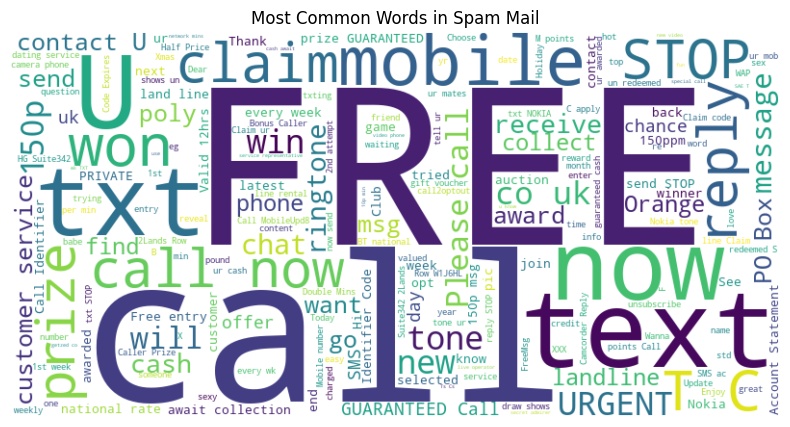

In [134]:
# WordCloud for spam mails
all_spam_words = " ".join(spam_rows["Message"]) # Joining all the words into a single string by joining them except the null ones
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_spam_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Spam Mail")
plt.show()

In [135]:
df.shape

(5572, 2)

In [136]:
# Label Encoding spam - 0; ham - 1
map = {"spam":0, "ham":1}
mail_data = df.copy()
mail_data["Category"] = mail_data["Category"].replace(map)
# Or 
# mail_data.loc[mail_data['Category]=='spam', 'Category',] = 0
# mail_data.loc[mail_data['Category]=='ham', 'Category',] = 1

mail_data

C:\Users\Monish D\AppData\Local\Temp\ipykernel_568\238296434.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mail_data["Category"] = mail_data["Category"].replace(map)


,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will ü b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [137]:
# Spam - 0
# ham - 1


In [138]:
# Separating text and label
X = mail_data['Message']
Y = mail_data['Category']
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [139]:
Y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: int64

In [140]:
# Splitting into training data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.2, random_state=42)
X_train.shape

(4457,)

In [141]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4457,)
(1115,)
(4457,)
(1115,)


In [142]:
# Feature Extraction
# Text data to feature vectors that can be used as input to the Logistic Regression Model

feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
# Tfidf Vectorizer gives higher importance to those words that appear frequently in a Single Cell/Document but apear rarely in the entire corpus/dataset
# TF-IDF highlights words that are frequent in a document
# but uncommon across the corpus, making them highly discriminative features.

# min_df = 1; the minimum value for any word;
# stop_words = 'english' - will ignore stopwords in english and will be removed
# lowercase = True - convert all the words to lowercase
feature_extraction

TfidfVectorizer(stop_words='english')

In [143]:
X_train_features = feature_extraction.fit_transform(X_train) # Fitting and Transforming
X_test_features = feature_extraction.transform(X_test)# **Only fitting**

In [144]:
# Converting Y_training and Y_test to integers
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [145]:
print(X_test_features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7451 stored elements and shape (1115, 7473)>
  Coords	Values
  (0, 1826)	0.26085674200205033
  (0, 2342)	0.4417034581331617
  (0, 2881)	0.26051770633962634
  (0, 3486)	0.4555858633647755
  (0, 3755)	0.49870855272331394
  (0, 6959)	0.24194759485074488
  (0, 7207)	0.39265124703425036
  (1, 1842)	0.6201017131974141
  (1, 3488)	0.5387493787126066
  (1, 4743)	0.3713787517229944
  (1, 6544)	0.43278261863790546
  (2, 3972)	1.0
  (3, 1244)	0.23967908225611448
  (3, 1589)	0.2973016168612901
  (3, 2716)	0.5740035323646439
  (3, 3081)	0.2507835262058189
  (3, 3125)	0.2973016168612901
  (3, 3271)	0.20639900507589595
  (3, 3278)	0.27248494199006806
  (3, 3922)	0.26218509131109996
  (3, 3968)	0.24480250655910207
  (3, 5405)	0.24766826711884604
  (3, 6823)	0.25796811779781414
  (4, 1933)	1.0
  (5, 180)	0.42814748161848176
  :	:
  (1109, 5550)	0.32781377326729844
  (1109, 5626)	0.3201444055670381
  (1109, 6018)	0.2363327059589194
  (1109, 6

In [146]:
X_train_features.shape

(4457, 7473)

In [147]:
# Training our Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_features, Y_train)

LogisticRegression()

In [148]:
y_pred = model.predict(X_test_features)
accuracy_score = accuracy_score(y_pred, Y_test)
accuracy_score

0.9596412556053812

In [149]:
confu_matrix = confusion_matrix(Y_test, y_pred)
confu_matrix

# TN FP
# FN TP

array([[105,  44],
       [  1, 965]])

In [150]:
class_report1 = classification_report(Y_test, y_pred, target_names=map)
print(class_report1)

              precision    recall  f1-score   support

        spam       0.99      0.70      0.82       149
         ham       0.96      1.00      0.98       966

    accuracy                           0.96      1115
   macro avg       0.97      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115



In [151]:
# Precision = TP/(TP+FP) EG. if Precision = 0.95; 95% of emails marked as spam are truly spam
# Recall = TP/(TP+FN) EG. Recall = 0.80 → You caught 80% of all spam emails


In [152]:
# The F1 score is kinda bad as there is class imbalance
# Fixing the f1score by fixing the threshold


from sklearn.metrics import f1_score
y_probs = model.predict_proba(X_test_features)[:,1]
thresholds = np.linspace(0.1, 0.9, 50)
f1_scores = [
    f1_score(Y_test, (y_probs >= t).astype(int))
    for t in thresholds
]

best_threshold = thresholds[np.argmax(f1_scores)]
max(f1_scores)


0.9851510496671787

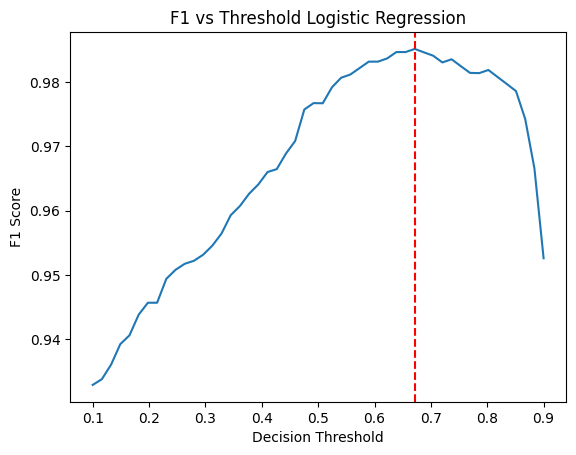

In [153]:
import matplotlib.pyplot as plt

plt.plot(thresholds, f1_scores)
plt.axvline(best_threshold, color='red', linestyle='--')
plt.xlabel("Decision Threshold")
plt.ylabel("F1 Score")
plt.title("F1 vs Threshold Logistic Regression")
plt.show()

In [154]:
probs = model.predict_proba(X_test_features)[:,1]
prob_final = (probs >= best_threshold).astype(int)

In [155]:
class_report2 = classification_report(Y_test, prob_final, target_names=map)
print(class_report2)

              precision    recall  f1-score   support

        spam       0.97      0.83      0.90       149
         ham       0.97      1.00      0.99       966

    accuracy                           0.97      1115
   macro avg       0.97      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [156]:
print(class_report1)
print("--"*50)
print(class_report2)

              precision    recall  f1-score   support

        spam       0.99      0.70      0.82       149
         ham       0.96      1.00      0.98       966

    accuracy                           0.96      1115
   macro avg       0.97      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

        spam       0.97      0.83      0.90       149
         ham       0.97      1.00      0.99       966

    accuracy                           0.97      1115
   macro avg       0.97      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [157]:
# In class_report1 the precision for spam is 0.99; 
# It means out of all the predicted, 99% are actually spam 
# and the rest 1% is actually ham, but is marked as spam

# In class_report2 the precision for spam is 0.97;
# That means out of all the predicted spam, 97% are actually spam
# and the rest 3% is actually ham, that is wrongly markes as spam

In [180]:
input1 = ["Congratulations! You have won a ₹50,000 cash prize. Click the link now to claim your reward before it expires."]
input1_feature = feature_extraction.transform(input1)
y_input_pred1 = model.predict_proba(input1_feature)[:,1]

input_prob_final1 = (y_input_pred1 >= best_threshold).astype(int)
output = []
for key, value in map.items():
    if int(input_prob_final1[0]) == value:
        # output.append(key)
        print(key)
    

# print(str(output))

spam


In [186]:
# Function the prints the output based on user input
def predict_spam_ham(user_input, model=model, threshold = best_threshold, feature_extraction=feature_extraction):
    input_feature = feature_extraction.transform(user_input)
    y_input_pred_prob = model.predict_proba(input_feature)[0,1]
    
    final_prediction = (y_input_pred_prob >= threshold).astype(int)
    if final_prediction==0:
        return "spam"
    else:
        return "ham"

In [187]:
input = ["URGENT: Your account has been selected for a limited-time offer. Reply YES to receive free benefits today."]
result = predict_spam_ham(input)
print(result)

spam


In [ ]:
input = ["Hi, just checking if we’re still on for the project meeting tomorrow at 11 AM."]
result = predict_spam_ham(input)
print(result)

ham


In [190]:

# -------------------------------------------------------------------------

In [191]:
# Converting the model, the threshold and the tfidf vectorizer to pickle files
import joblib
joblib.dump(model, "model.pkl")
joblib.dump(best_threshold, "threshold.pkl")
joblib.dump(feature_extraction, "vectorizer.pkl")

['vectorizer.pkl']